In [2]:
import sys, re
from scipy.optimize import fmin_cg, fmin_bfgs, fmin
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [4]:
def costFunction(theta, X, Y):
    theta.shape = (1, 3)
    m = Y.size
    h = sigmoid(X.dot(theta.conj().transpose()))
    first = ((-Y).T.dot(np.log(h)))
    second = ((1-Y).T.dot(np.log(1-h)))
    J = (first-second) / m
    return J.sum()

In [32]:
def gradientFunction(theta, X, Y):
    theta.shape = (1, 3)
    grad = np.zeros(3)
    h = sigmoid(X.dot(theta.conj().transpose()))
    delta = h - Y
    l = grad.size

    for i in range(l):
        sumdelta = delta.conj().transpose().dot(X[:,i])
        grad[i] = (1.0 / m) * sumdelta * (-1)
    
    theta.shape = (3,)
    return grad

In [5]:
data = np.loadtxt("data/ex2data1.txt", delimiter=",")

X = data[:,:2]
Y = data[:,2]

In [21]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)

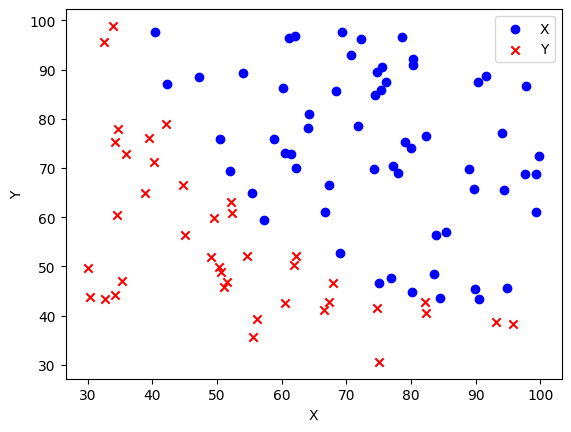

In [22]:
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["X", "Y"])

In [30]:
m, n = X.shape
Y.shape = (m, 1)

i = np.ones(shape=(m,3))
i[:, 1:3] = X

In [33]:
def learning_parameters(i, y):
    def f(theta):
        return costFunction(theta, i, y)
    
    def fprime(theta):
        return gradientFunction(theta, i, y)
    
    theta = np.zeros(3)

    return fmin_bfgs(f, theta, fprime, disp=True, maxiter=400)

learning_parameters(i, Y)

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 104
         Gradient evaluations: 92


/var/folders/dq/tf6_mpwj1ws9yh7kwt2c5c9r0000gn/T/ipykernel_18529/3904406946.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = (1.0 / m) * sumdelta * (-1) # TODO: m or l?
/Users/kinjal/Desktop/DRIVE/STUDY/MTech/Semester 1/Foundation of Machine Learning/LAB/env/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1291: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


array([0., 0., 0.])

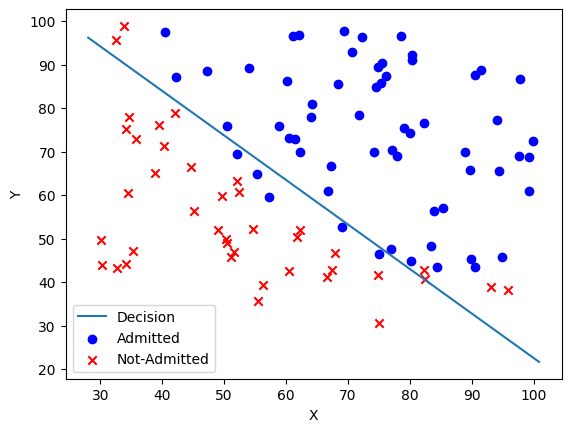

In [36]:
theta = [-25.161272, 0.206233, 0.201470]

plot_x = np.array([min(i[:,1]) - 2, max(i[:,2]) + 2])
plot_y = (-1/theta[2]) * (theta[1]*plot_x+theta[0])

plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Decision", "Admitted", "Not-Admitted"])
plt.show()

In [37]:
prob = sigmoid(np.array([1.0, 45.0, 85.0]).dot(np.array(theta).conj().transpose()))
print("Probability:", prob)

Probability: 0.7762878133064746


In [39]:
def predict(theta, X):
    m,n = X.shape
    p = np.zeros(shape=(m,1))
    h = sigmoid(X.dot(theta.conj().transpose()))

    for i in range(h.shape[0]):
        if h[i] > 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
    return p

In [40]:
p = predict(np.array(theta), i)
print("Training Accuracy:", ((Y[np.where(p == Y)].size / float(Y.size)) * 100.0))

Training Accuracy: 89.0
